In [148]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)




Using TensorFlow backend.
/Users/charlesnatoli/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [250]:
#loading in the data

df = pd.read_csv(path + '/GEFCOM/Load_history.csv') 

def replace_fun(x) : 
    try : 
        return(x.replace(',',''))
    except :
        return(x)

for col in df.columns :
    df[col] = df[col].apply(lambda x : replace_fun(x))
    
df['date'] = pd.to_datetime((df.year*10000+df.month*100+df.day).apply(str),format='%Y%m%d')

yesterday = df.copy() 

##get rid of first dy fo     

temps =  pd.read_csv(path + '/GEFCOM/temperature_history.csv')

df.columns =  "load_"+ df.columns 
temps.columns =  "temp_"+ temps.columns 
temps = temps[temps['temp_station_id'] == 1]

df = df.merge(right = temps,left_on = ['load_year','load_month','load_day'],how ='left',
              right_on = ['temp_year','temp_month','temp_day'])

### remove nan rows
df = df[-pd.isnull(df['load_h24'])]
df

,load_zone_id,load_year,load_month,load_day,load_h1,load_h2,load_h3,load_h4,load_h5,load_h6,...,temp_h15,temp_h16,temp_h17,temp_h18,temp_h19,temp_h20,temp_h21,temp_h22,temp_h23,temp_h24
0,1,2004,1,1,16853,16450,16517,16873,17064,17727,...,55.0,55.0,52.0,46.0,40.0,40.0,39.0,38.0,40.0,41.0
1,1,2004,1,2,14155,14038,14019,14489,14920,16072,...,54.0,56.0,57.0,53.0,50.0,47.0,46.0,45.0,45.0,45.0
2,1,2004,1,3,14439,14272,14109,14081,14775,15491,...,69.0,68.0,68.0,65.0,64.0,63.0,62.0,63.0,63.0,62.0
3,1,2004,1,4,11273,10415,9943,9859,9881,10248,...,71.0,72.0,71.0,68.0,67.0,67.0,65.0,64.0,65.0,64.0
4,1,2004,1,5,10750,10321,10107,10065,10419,12101,...,66.0,66.0,66.0,66.0,63.0,54.0,52.0,49.0,47.0,47.0
5,1,2004,1,6,15742,15682,16132,16761,17909,20234,...,46.0,46.0,45.0,39.0,39.0,39.0,38.0,36.0,32.0,32.0
6,1,2004,1,7,26014,26447,27286,27923,29130,31503,...,31.0,31.0,31.0,30.0,30.0,30.0,29.0,31.0,30.0,30.0
7,1,2004,1,8,25104,25122,25464,25715,26219,28552,...,36.0,35.0,35.0,34.0,35.0,35.0,37.0,35.0,35.0,34.0
8,1,2004,1,9,21175,21056,21241,22062,23026,25610,...,33.0,33.0,33.0,31.0,31.0,31.0,30.0,29.0,27.0,26.0
9,1,2004,1,10,23405,23507,24067,24786,25418,26631,...,22.0,20.0,20.0,20.0,18.0,18.0,18.0,18.0,18.0,18.0


In [225]:
## make your data into a 2d numpy array
data = np.array(df)
Y = data[:,4:28]  
X = data[:,29:56]  

In [245]:

# create model
model = Sequential()
model.add(Dense(12, input_shape=(27,), activation='softplus'))
model.add(Dense(100, activation='softplus'))
model.add(Dense(100, activation='softplus'))
model.add(Dense(24, activation='linear')) 
# create model 

In [246]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
 

# Fit the model
model.fit(X, Y, epochs=20, batch_size=10) 


Epoch 1/20
31720/31720 [==============================] - 5s 158us/step - loss: 10884301199.0517 - acc: 0.0887
Epoch 2/20
31720/31720 [==============================] - 5s 142us/step - loss: 6775960227.7528 - acc: 0.1441
Epoch 3/20
31720/31720 [==============================] - 5s 142us/step - loss: 5674781002.6936 - acc: 0.1441
Epoch 4/20
31720/31720 [==============================] - 5s 142us/step - loss: 5633812977.7554 - acc: 0.1359
Epoch 5/20
31720/31720 [==============================] - 4s 141us/step - loss: 5633306320.5851 - acc: 0.1232
Epoch 6/20
31720/31720 [==============================] - 4s 141us/step - loss: 5633190225.7150 - acc: 0.1254
Epoch 7/20
31720/31720 [==============================] - 4s 141us/step - loss: 5633054065.7554 - acc: 0.1211
Epoch 8/20
31720/31720 [==============================] - 5s 144us/step - loss: 5633210643.2081 - acc: 0.1211
Epoch 9/20
31720/31720 [==============================] - 5s 144us/step - loss: 5633019769.2207 - acc: 0.1211
Epoch 10/

In [247]:
#make predictions
predictions = model.predict(X) 

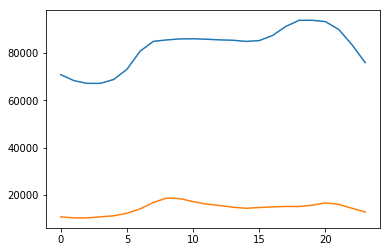

In [248]:
#plot 3 ranndom points
for i in [np.random.randint(len(X)) for i in range(3)] :
    plt.plot(predictions[i],label = "pred_" +  str(i))
    #plt.plot(Y[i],label = "actual_" +  str(i))
    plt.legend()
plt.show()